In [228]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### What are the ten most common movie names of all time?

In [19]:
#cast.title.value_counts()[0:10]
df = cast[['year', 'title']].drop_duplicates()
df.title.value_counts()

Hamlet                  17
Macbeth                 15
Carmen                  12
The Outsider            11
Maya                    11
Anna Karenina           10
Temptation              10
Othello                 10
She                     10
Paradise                 9
The Three Musketeers     9
Rage                     9
Underground              9
Vengeance                9
Blood Money              9
...
Roman Buildings                                     1
Zerkalo dlya geroya                                 1
Man-Eater                                           1
The Hunger Games: Mockingjay - Part 2               1
WinneToons - Die Legende vom Schatz im Silbersee    1
Chepachet                                           1
No More Monkeys Jumpin' on the Bed                  1
Good Night, Vienna                                  1
Foxy Lady                                           1
Uyirvarai Iniththaai                                1
Galegale Nigahle                                   

### Which three years of the 1930s saw the most films released?

In [32]:
df = cast.copy()
df.year = df.year // 10
df.head()

cast[cast.year // 10 == 193].year.value_counts()
#(cast[cast.year // 10 == 193].year == 1937).sum()

1937    27206
1936    25603
1938    25020
1939    24273
1935    23762
1934    20464
1933    15253
1932    14606
1931    11643
1930     9674
dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

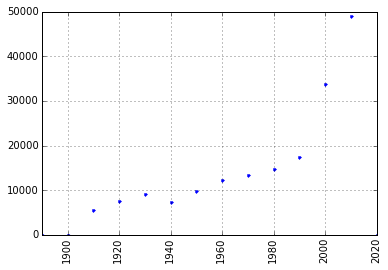

In [172]:
df = cast.copy()
df['decade'] = (cast.year // 10)*10
df = df.drop_duplicates(subset=['year', 'title'])
counts = df.decade.value_counts()
counts.sort_index().plot(style='.', rot=90)

### Plot the number of "Hamlet" films made each decade.

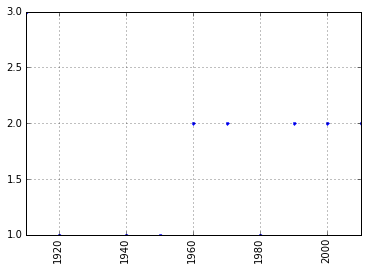

In [173]:
counts = df[df.title == 'Hamlet']
counts.decade.value_counts().sort_index().plot(
    rot=90, style='.')

Relative movie contribution by Hamlet over decades

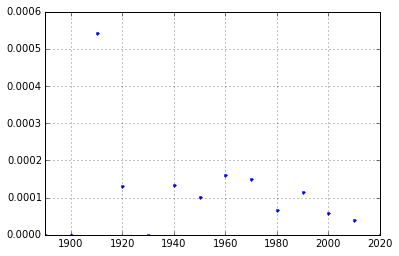

In [174]:
df_sub = df[df.title == 'Hamlet']
hamlet_counts = df_sub.decade.value_counts().sort_index()
counts = df.decade.value_counts().sort_index()

hamlet_counts.div(counts, fill_value=0).plot(style='.')

### Plot the number of "Rustler" characters in each decade of the history of film.

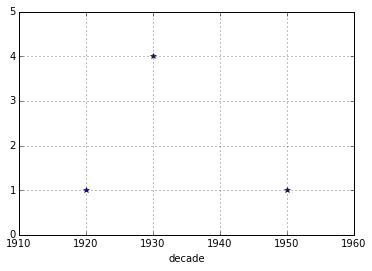

In [183]:
groups = df[df.character == 'Rustler'].groupby('decade')
groups.size().sort_index().plot(style='*', 
                                ylim=[0, 5],
                                xlim=[1910, 1960])

### Plot the number of "Hamlet" characters each decade.

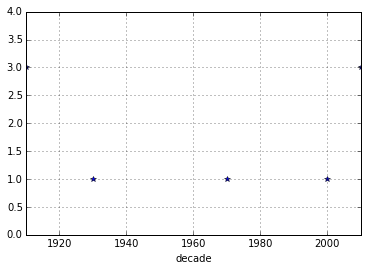

In [191]:
groups = df[df.character == 'Hamlet'].\
    groupby('decade').size().plot(style='*',
                                 xlim=1910,
                                 ylim=[0,4])

### What are the 11 most common character names in movie history?

In [156]:
groups = df.groupby('character')
groups.size().order(ascending=False)[:11]

character
Himself      1887
Doctor        517
Narrator      359
Policeman     337
John          298
David         297
Paul          278
Bartender     275
Jack          251
Father        244
Waiter        242
dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [163]:
groups = df.groupby('character')
groups.get_group('Herself').groupby('name').size().order(ascending=False)[:10]

name
Alicia Dattner     3
Miyuki Nakajima    2
Sara Hedgren       2
Ayumi Hamasaki     2
Yuki Sait?         1
Elsie Shelove      1
Desire Dubounet    1
Diana Barrows      1
Diane Pernet       1
Distancia          1
dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [164]:
groups = df.groupby('character')
groups.get_group('Himself').groupby('name').size().order(ascending=False)[:10]

name
Bill Corbett           11
Muhammad Ali            8
Steve Allen             8
Trace Beaulieu          7
Amitabh Bachchan        6
Henry Sapungan          5
Kareem Abdul-Jabbar     5
Tony Bennett            4
Max Baer                4
Peter Bogdanovich       4
dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [250]:
df[df.year == 1945].groupby('name').size().\
    order(ascending=False)[:12]

name
Eddie Acuff          19
Ernie Adams          15
Fred Aldrich         10
Roy Barcroft          9
Sam Ash               8
Charles Arnt          8
Jimmy Aubrey          8
John Abbott           7
Richard Alexander     7
Joss Ambler           6
Hank Bell             6
Philip Ahn            6
dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [249]:
counts = df[df.year == 1985].groupby('type')
c1 = counts.get_group('actor').groupby('name').size().\
    order(ascending=False)[:15]
    
c2 = counts.get_group('actress').groupby('name').size().\
    order(ascending=False)[:15]

print(c1.head())
print(c2.head())

name
Asrani         9
Lalu Alex      9
Vikas Anand    6
Bahadur        6
Chiranjeevi    5
dtype: int64
name
Liliya Gurova        2
Zhanna Kuanysheva    1
Kurara               1
Kitty Chan           1
Kaori (II) Aso       1
dtype: int64


### Plot how many roles Mammootty has played in each year of his career.

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [169]:
df[df.character.str.startswith('Patron in')].groupby('name').head()

,title,year,name,type,character,n,decade
19529,Let It Ride,1989,Ralph Ahn,actor,Patron in Chinese Restaurant,43,1980
23901,Missing Pieces,2012,Rico Alago,actor,Patron in Restaurant,NaN,2010
46065,The Mothman Prophecies,2002,Tony Amen,actor,Patron in Coffee Shop,NaN,2000
90020,Crashing,2007,Robyn August,actor,Patron in the Coffee House,50,2000


### What are the 10 most frequent roles that start with the word "Science"?

In [171]:
df[df.character.str.startswith('Science')].groupby('name').head(100)

,title,year,name,type,character,n,decade
11134,Teen Wolf Too,1987,Matthew T. Adams,actor,Science Student,NaN,1980
30551,Three O'Clock High,1987,Michael Alex,actor,Science Kid,25,1980
128253,The Giggles,2013,Kevin Barnstein,actor,Science Performer 3,19,2010
233909,Homecoming,2011,Ryan Boyle,actor,Science Student,NaN,2010
329665,"A Wreck, a Tangle",2000,Peter Carroll,actor,Science Voice Over,6,2000


Most problems below are quite similar

### Plot the n-values of the roles that Judi Dench has played over her career.

### Plot the n-values of Cary Grant's roles through his career.

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?